<a href="https://colab.research.google.com/github/ArySuby/sasap-test/blob/main/TIENDACARS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://tiendacars.com/productos/autos-usados/chevrolet-cruze-1-4t-premier-at-5-puertas-2021/'
headers = {'User-Agent': 'Mozilla/5.0'}
resp = requests.get(url, headers=headers)
resp.raise_for_status()

soup = BeautifulSoup(resp.content, 'html.parser')

titulo = soup.select_one('h1.product_title.entry-title').get_text(strip=True)
precio = soup.select_one('p.price').get_text(strip=True)

# Extraer atributos de la tabla
attrs = {}
for row in soup.select('table.shop_attributes tr'):
    th = row.find('th').get_text(strip=True)
    td = row.find('td').get_text(strip=True)
    attrs[th] = td

# Organizar en DataFrame
df = pd.DataFrame([{
    'Título': titulo,
    'Precio': precio,
    **attrs
}])
print(df)


                                           Título  \
0  Chevrolet Cruze 1.4T Premier AT 5 puertas 2021   

                                              Precio      Marca Modelo  \
0  $26,900,000.00El precio indicado puede estar s...  Chevrolet  Cruze   

  Combustible pa_sucursal       Color Kilómetros   Año           pa_estado  
0       Nafta              Gris Plata      96229  2021  EN VENTA – PROPIOS  


In [10]:
import requests
from bs4 import BeautifulSoup

# URL del sitemap index
sitemap_index_url = 'https://tiendacars.com/sitemap_index.xml'

# Encabezados como navegador
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'
}

# Hacemos el GET con headers
resp = requests.get(sitemap_index_url, headers=headers)
resp.raise_for_status()

# Parseamos
soup = BeautifulSoup(resp.content, 'xml')

# Extraemos los sitemaps
sitemap_urls = [loc.get_text() for loc in soup.find_all('loc')]
print(f'Sitemaps encontrados: {sitemap_urls}')


Sitemaps encontrados: ['https://tiendacars.com/post-sitemap.xml', 'https://tiendacars.com/page-sitemap.xml', 'https://tiendacars.com/product-sitemap.xml', 'https://tiendacars.com/qsm_quiz-sitemap.xml', 'https://tiendacars.com/web-story-sitemap.xml', 'https://tiendacars.com/category-sitemap.xml', 'https://tiendacars.com/product_cat-sitemap.xml', 'https://tiendacars.com/product_tag-sitemap.xml']


In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'
}

# Paso 1: Obtener URLs del sitemap
sitemap_url = 'https://tiendacars.com/product-sitemap.xml'
resp = requests.get(sitemap_url, headers=headers)
resp.raise_for_status()

soup = BeautifulSoup(resp.content, 'xml')
all_urls = [loc.get_text() for loc in soup.find_all('loc')]

# Paso 2: Filtrar URLs para quedarnos solo con productos usados (según patrón de URL)
product_urls = [url for url in all_urls if '/productos/autos-usados/' in url]

print(f'Total de URLs originales: {len(all_urls)}')
print(f'Total de URLs filtradas (productos usados): {len(product_urls)}')

datos = []

for i, url in enumerate(product_urls, 1):
    try:
        r = requests.get(url, headers=headers)
        r.raise_for_status()
        r.encoding = 'utf-8'
        s = BeautifulSoup(r.text, 'html.parser')

        # Título principal
        titulo = s.select_one('h1.product_title.entry-title')
        if titulo:
            titulo = titulo.get_text(strip=True)
        else:
            titulo_tag = s.select_one('title')
            titulo = titulo_tag.get_text(strip=True) if titulo_tag else 'N/A'

        # Precio
        precio_tag = s.select_one('p.price')
        precio = precio_tag.get_text(strip=True) if precio_tag else 'N/A'

        # Limpiar precio a número
        precio_num = ''.join(c for c in precio if c.isdigit())

        # Atributos
        attrs = {}
        for row in s.select('table.shop_attributes tr'):
            th = row.find('th').get_text(strip=True)
            td = row.find('td').get_text(strip=True)
            attrs[th] = td

        # Validar que título y precio sean válidos para guardar
        if titulo != 'N/A' and precio != 'N/A' and precio_num != '':
            registro = {'URL': url, 'Título': titulo, 'Precio': precio, 'Precio_Num': precio_num}
            registro.update(attrs)
            datos.append(registro)
            print(f"[{i}/{len(product_urls)}] {titulo}")
        else:
            print(f"[{i}/{len(product_urls)}] URL descartada por falta de datos: {url}")

        time.sleep(1)

    except Exception as e:
        print(f"[{i}] Error procesando {url}: {e}")

df = pd.DataFrame(datos)
df.to_csv('tiendacars_autos_filtrado.csv', index=False)
print("✅ Datos guardados en 'tiendacars_autos_filtrado.csv'")


Total de URLs originales: 173
Total de URLs filtradas (productos usados): 87
[1/87] Fiat Cronos Atractive 2023
[2/87] Nissan Kicks Exclusive CVT 2024
[3/87] Ford Ecosport Titanium 2.0  AT 2020
[4/87] Renault Logan Life 2023
[5/87] Volkswagen Tiguan Comfortline 2.0TSI DSG 2018
[6/87] Fiat Cronos Drive 1.3 Manual 2023
[7/87] Volkswagen Taos 1.4 250 TSI Highline AT 2022
[8/87] Toyota Yaris XLS 1.5 16V Flex 4 puertas AT 2023
[9/87] Toyota Yaris XLS 1.5 16V 4 puertas AT 2023
[10/87] Volkswagen Amarok 2.0 TD Comfortline 4×2 AT 180cv 2023
[11/87] Fiat Cronos Precision 1.3 CVT 2023
[12/87] Chevrolet Onix LS 1.2 12V 5 puertas 2023
[13/87] Volkswagen T-Cross Comfortline 2020
[14/87] Renault Logan Life 2023
[15/87] Volkswagen T-Cross Highline AT 2019
[16/87] Nissan X-Trail Exclusive CVT 2018
[17/87] Fiat Cronos 1.3 Drive 2024
[18/87] Volkswagen Virtus 1.6 Trendline MT 2020
[19/87] Renault Captur 2.0 Zen 2018
[20/87] Volkswagen Nivus Highline TSI AT 2021
[21/87] Volkswagen Vento 1.4 TSI Highline D

In [95]:
import pandas as pd

df = pd.read_csv('tiendacars_autos_filtrado.csv')

In [97]:
def categoria_km(km):
    try:
        km = float(km)
        if km < 50000:
            return '< 50,000 km'
        elif 50000 <= km <= 100000:
            return '50,000 - 100,000 km'
        else:
            return '> 100,000 km'
    except:
        return 'Sin dato'

df['Km_Categoria'] = df['Kilómetros'].apply(categoria_km)


In [98]:
agrupado = df.groupby(['Marca', 'Modelo', 'Km_Categoria']).size().reset_index(name='Cantidad')

print(agrupado.head(10))

       Marca   Modelo         Km_Categoria  Cantidad
0  Chevrolet    Agile         > 100,000 km         1
1  Chevrolet    Cruze  50,000 - 100,000 km         1
2  Chevrolet     Onix  50,000 - 100,000 km        10
3  Chevrolet     Onix          < 50,000 km         1
4  Chevrolet    Sonic  50,000 - 100,000 km         1
5  Chevrolet  Tracker         > 100,000 km         1
6    Citroën       C3  50,000 - 100,000 km         1
7    Citroën   Cactus  50,000 - 100,000 km         1
8       Fiat      500         > 100,000 km         1
9       Fiat   Cronos  50,000 - 100,000 km         4


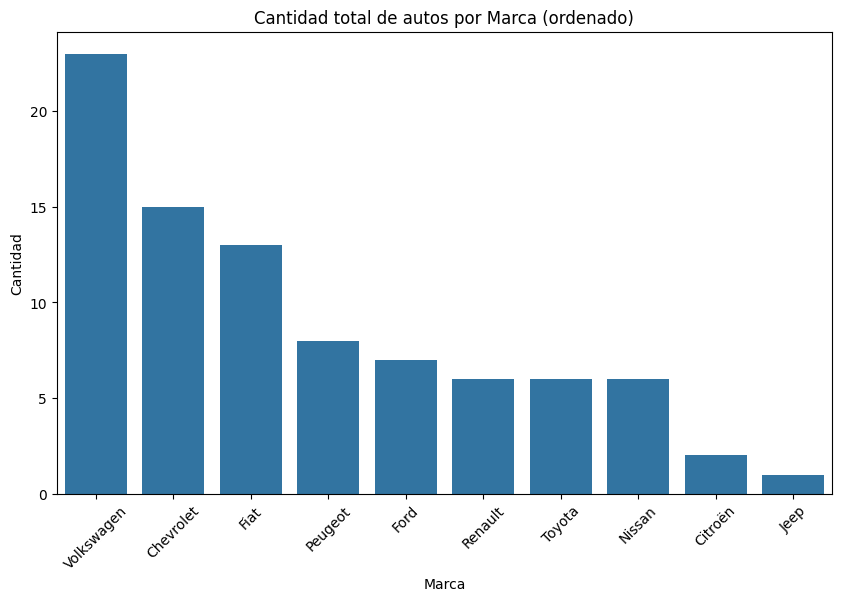

In [99]:
# Ordenar de mayor a menor
total_por_marca_ordenado = total_por_marca.sort_values(by='Cantidad', ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=total_por_marca_ordenado,
    x='Marca',
    y='Cantidad',
    errorbar=None,
    order=total_por_marca_ordenado['Marca']  # orden explícito
)
plt.title('Cantidad total de autos por Marca (ordenado)')
plt.xticks(rotation=45)
plt.show()


In [100]:
import pandas as pd
import numpy as np
import re

def limpiar_precio(precio_str):
    if pd.isna(precio_str):
        return np.nan
    match = re.search(r'[\d,]+\.\d{2}', precio_str)
    if not match:
        return np.nan
    precio_num = match.group()
    precio_num = precio_num.replace(',', '')
    try:
        return int(float(precio_num))
    except:
        return np.nan

# Aplicar la función
df['Precio_Num'] = df['Precio'].apply(limpiar_precio)

print(df[['Precio', 'Precio_Num']].head(50))



                                               Precio  Precio_Num
0   $20,500,000.00El precio indicado puede estar s...    20500000
1   $37,000,000.00El precio indicado puede estar s...    37000000
2   $25,500,000.00El precio indicado puede estar s...    25500000
3   $20,500,000.00El precio indicado puede estar s...    20500000
4   $34,900,000.00El precio indicado puede estar s...    34900000
5   $21,000,000.00El precio indicado puede estar s...    21000000
6   $39,000,000.00El precio indicado puede estar s...    39000000
7   $24,900,000.00El precio indicado puede estar s...    24900000
8   $25,900,000.00El precio indicado puede estar s...    25900000
9   $39,000,000.00El precio indicado puede estar s...    39000000
10  $24,000,000.00El precio indicado puede estar s...    24000000
11  $19,700,000.00El precio indicado puede estar s...    19700000
12  $25,100,000.00El precio indicado puede estar s...    25100000
13  $20,500,000.00El precio indicado puede estar s...    20500000
14  $27,00

In [101]:
import pandas as pd
import numpy as np

# Cargar el dataset limpio (ajustá el path)
df = pd.read_csv('tiendacars_autos_filtrado.csv')

# Limpiar y convertir el precio a numérico
df['Precio_Num'] = df['Precio_Num'].apply(pd.to_numeric, errors='coerce')

# Revisar datos nulos en precio y variables importantes
print(df[['Precio_Num', 'Marca', 'Modelo', 'Kilómetros', 'Año', 'Combustible']].info())

# Eliminar filas con precio nulo
df = df.dropna(subset=['Precio_Num'])

# Para simplificar, también podés eliminar filas con nulos en variables que usarás
df = df.dropna(subset=['Marca', 'Modelo', 'Kilómetros', 'Año', 'Combustible'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Precio_Num   87 non-null     float64
 1   Marca        87 non-null     object 
 2   Modelo       87 non-null     object 
 3   Kilómetros   87 non-null     int64  
 4   Año          87 non-null     int64  
 5   Combustible  86 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.2+ KB
None


In [102]:
df.loc[26, 'Precio_Num'] = 37000000
df.loc[27, 'Precio_Num'] = 42900000

In [103]:
# Dummies
df_encoded = pd.get_dummies(df, columns=['Marca', 'Modelo', 'Combustible'], drop_first=True)

# Target
y = df_encoded['Precio_Num']

# Predictoras
X = df_encoded.drop(columns=['Precio_Num'])

X = df_encoded.drop(columns=[
    'Precio_Num', 'URL', 'Título', 'Precio', 'pa_sucursal', 'Color', 'pa_estado'
])

In [104]:
X = X.astype(int)


In [105]:
print(X.columns)


Index(['Kilómetros', 'Año', 'Marca_Citroën', 'Marca_Fiat', 'Marca_Ford',
       'Marca_Jeep', 'Marca_Nissan', 'Marca_Peugeot', 'Marca_Renault',
       'Marca_Toyota', 'Marca_Volkswagen', 'Modelo_208', 'Modelo_408',
       'Modelo_500', 'Modelo_Agile', 'Modelo_Amarok', 'Modelo_C3',
       'Modelo_Cactus', 'Modelo_Captur', 'Modelo_Cronos', 'Modelo_Cruze',
       'Modelo_EXPERT', 'Modelo_Ecosport', 'Modelo_Etios', 'Modelo_Fiesta',
       'Modelo_Fluence', 'Modelo_Frontier', 'Modelo_Gol trend', 'Modelo_Golf',
       'Modelo_KA', 'Modelo_Kicks', 'Modelo_Kwid', 'Modelo_Logan',
       'Modelo_Mobi', 'Modelo_Nivus', 'Modelo_Onix', 'Modelo_Palio',
       'Modelo_Polo', 'Modelo_Punto', 'Modelo_Rav 4', 'Modelo_Renegade',
       'Modelo_Saveiro', 'Modelo_Sonic', 'Modelo_Suran', 'Modelo_T-Cross',
       'Modelo_Taos', 'Modelo_Tiguan', 'Modelo_Tracker', 'Modelo_Vento',
       'Modelo_Versa', 'Modelo_Virtus', 'Modelo_X-trail', 'Modelo_Yaris',
       'Combustible_GNC', 'Combustible_Nafta'],
      dtyp

In [110]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Crear antigüedad
anio_actual = 2025
df['Antiguedad'] = anio_actual - df['Año']

# 2. Variable objetivo log del precio
df['Precio_Log'] = np.log(df['Precio_Num'])

# 3. Codificación dummies
df_encoded = pd.get_dummies(df, columns=['Marca', 'Modelo', 'Combustible'], drop_first=True)

# 4. Definir X e y
cols_drop = ['Precio_Num', 'URL', 'Título', 'Precio', 'pa_sucursal', 'Color', 'pa_estado', 'Año']
X = df_encoded.drop(columns=cols_drop)
y = df_encoded['Precio_Log']

# 5. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# 6. Escalar columnas numéricas
cols_num = ['Kilómetros', 'Antiguedad']
scaler = StandardScaler()
X_train[cols_num] = scaler.fit_transform(X_train[cols_num])
X_test[cols_num] = scaler.transform(X_test[cols_num])

# 7. Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Predecir y evaluar
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE (log scale): {rmse:.3f}")
print(f"R2: {r2:.3f}")


RMSE (log scale): 0.000
R2: 1.000


In [109]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE (log scale): {rmse_rf:.3f}")
print(f"Random Forest R2: {r2_rf:.3f}")


Random Forest RMSE (log scale): 0.117
Random Forest R2: 0.808
